In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

In [6]:
X.shape

(506, 13)

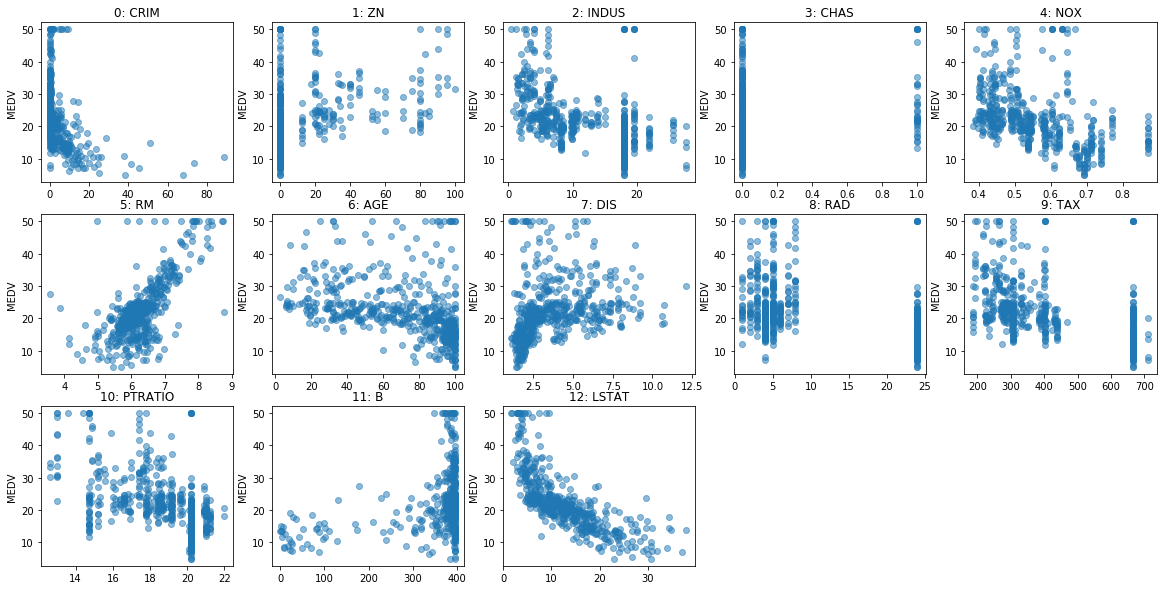

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [8]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
X.shape

(506, 13)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648379

In [12]:
from sklearn.ensemble import RandomForestRegressor
np.mean(cross_val_score(RandomForestRegressor(n_estimators=100), X_train, y_train, cv=10))

0.8443844398020499

In [13]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941362

In [14]:
np.set_printoptions(suppress=True, precision=3)

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [16]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=False, n_jobs=None,
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

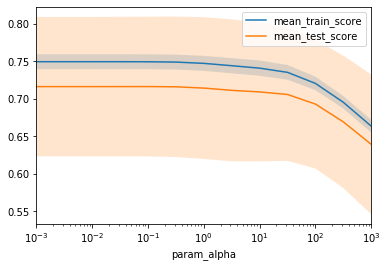

In [17]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/ridge_alpha_search.png")

In [18]:
grid.best_params_

{'alpha': 0.1}

In [19]:
grid.best_score_

0.7160600746856846

In [20]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [21]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.8065778683062417

In [22]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.8227099613418746

In [23]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=False, n_jobs=None,
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

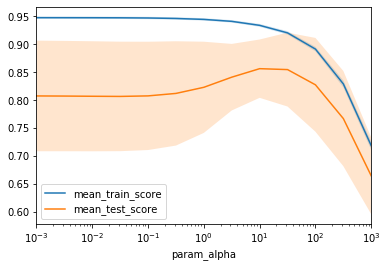

In [24]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/ridge_alpha_search_poly.png")

In [25]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 10.0}
0.8560976200047948


In [26]:
grid.score(X_test, y_test)

0.8055433024041891

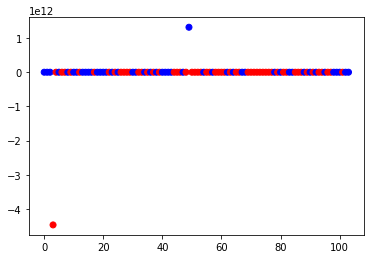

In [27]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.savefig("images/lr_coefficients_large.png")

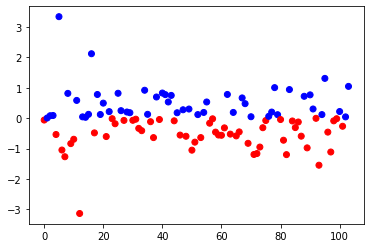

In [28]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")
plt.savefig("images/ridge_coefficients.png")

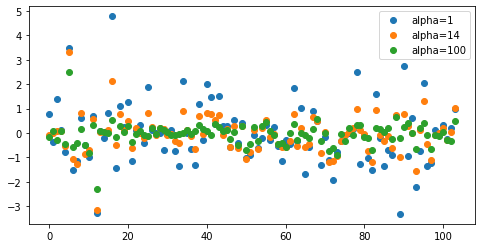

In [29]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()
plt.savefig("images/ridge_coefficients_alpha.png")

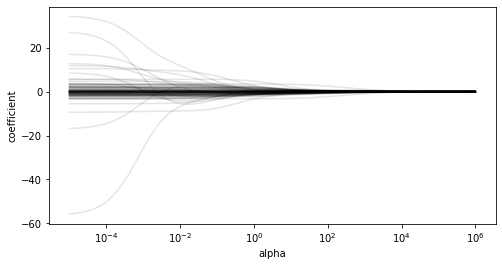

In [30]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.savefig("images/ridge_coefficient_paths.png")

(-1, 1)

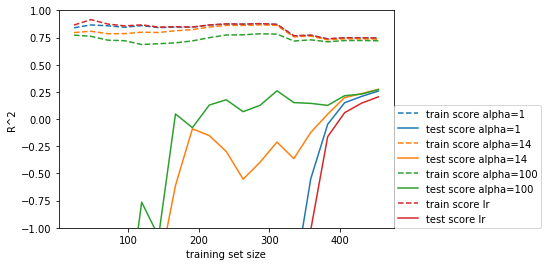

In [31]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=14), "alpha=14")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

In [32]:
X.shape

(506, 13)

# Lasso

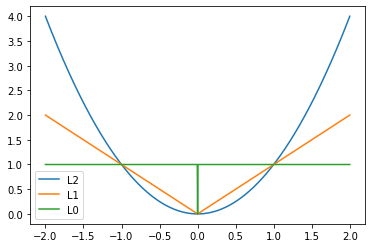

In [33]:
line = np.linspace(-2, 2, 1001)
plt.plot(line, line ** 2, label="L2")
plt.plot(line, np.abs(line), label="L1")
plt.plot(line, line!=0, label="L0")
plt.legend()
plt.savefig("images/l2_l1_l0.png")

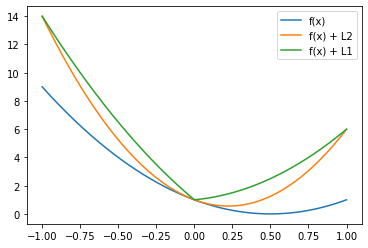

In [34]:
line = np.linspace(-1, 1, 1001)

alpha_l1 = 5
alpha_l2 = 5

f_x = (2 * line - 1) ** 2
f_x_l2 =  f_x + alpha_l2 * line ** 2
f_x_l1 =  f_x + alpha_l1 * np.abs(line)

plt.plot(line, f_x, label="f(x)")
plt.plot(line, f_x_l2, label="f(x) + L2")
plt.plot(line, f_x_l1, label="f(x) + L1")
plt.legend()
plt.savefig("images/l1_kink.png")

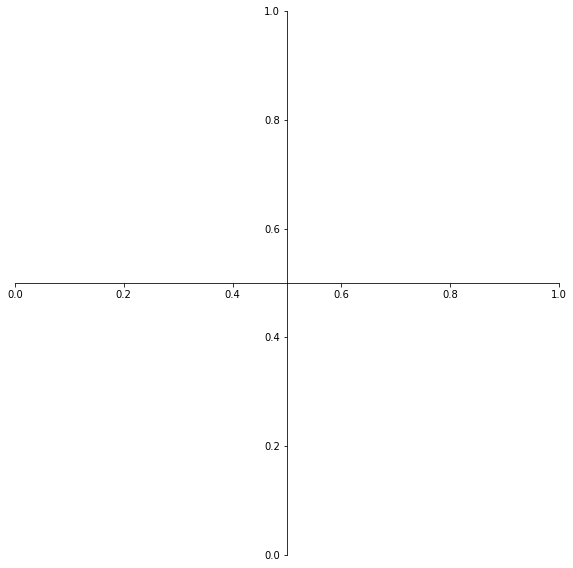

In [37]:
xline = np.linspace(-2., 2, 1001)
yline = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(xline, yline)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)

plt.figure(figsize=(10, 10))
#l2_contour = plt.contour(xx, yy, l2, levels="1", colors='k')
#l1_contour = plt.contour(xx, yy, l1, levels="1", colors='k')
ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
#plt.clabel(l2_contour, inline=1, fontsize=10, fmt={1.0: 'L2'}, manual=[(-1, -1)])
#plt.clabel(l1_contour, inline=1, fontsize=10, fmt={1.0: 'L1'}, manual=[(-1, -1)])

#ax.set_xticks(np.arange(-2, 2, .5))
#ax.set_yticks([.5, 1, 2])
plt.savefig("images/l1l2ball.png")

In [ ]:
xline = np.linspace(-2., 2, 1001)
yline = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(xline, yline)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)

quadratic = np.sqrt(2 * (xx - 2.) ** 2 + (yy - 1.7) ** 2 + xx * yy)

plt.figure(figsize=(10, 10))
l2_contour = plt.contour(xx, yy, l2, levels=1, colors='k')
l1_contour = plt.contour(xx, yy, l1, levels=1, colors='k')
quadratic_contour = plt.contour(xx, yy, quadratic, levels=[1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3])


ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.clabel(l2_contour, inline=1, fontsize=10, fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=10, fmt={1.0: 'L1'}, manual=[(-1, -1)])
#plt.clabel(quadratic_contour, inline=1, fontsize=10)


#ax.set_xticks(np.arange(-2, 2, .5))
#ax.set_yticks([.5, 1, 2])
plt.savefig("images/l1l2ball_intersect.png")



In [ ]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

In [ ]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("images/lasso_alpha_search.png")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
grid.score(X_test, y_test)

In [ ]:
lasso = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.savefig("images/lasso_coefficients.png")

In [ ]:
print(X_poly.shape)
np.sum(lasso.coef_ != 0)

In [ ]:
from sklearn.linear_model import lars_path
# lars_path computes the exact regularization path which is piecewise linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
alphas, active, coefs = lars_path(X_train, y_train, eps=0.00001, method="lasso")

In [ ]:
plt.plot(alphas, coefs.T, alpha=.5)
plt.xscale("log")
plt.savefig("images/lars_path.png")

# Elastic Net

In [ ]:
xline = np.linspace(-2., 2, 1001)
yline = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(xline, yline)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)
elastic = .5 * l2 + .5 * l1

plt.figure(figsize=(10, 10))
l2_contour = plt.contour(xx, yy, l2, levels="1", colors='m')
l1_contour = plt.contour(xx, yy, l1, levels="1", colors='g')
elasticnet_contour = plt.contour(xx, yy, elastic, levels="1", colors='b')
ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.clabel(l2_contour, inline=1, fontsize=10, fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=10, fmt={1.0: 'L1'}, manual=[(-1, -1)])
plt.clabel(elasticnet_contour, inline=1, fontsize=10, fmt={1.0: 'elastic'}, manual=[(-1, -1)])

#ax.set_xticks(np.arange(-2, 2, .5))
#ax.set_yticks([.5, 1, 2])
plt.savefig("images/l1l2_elasticnet.png")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
print(param_grid)

In [ ]:
from sklearn.linear_model import ElasticNet
grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
grid.score(X_test, y_test)

In [ ]:
pd.DataFrame(grid.cv_results_).columns

In [ ]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [ ]:
res

In [ ]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)
plt.savefig("images/elasticnet_search.png")

In [ ]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [ ]:
(grid.best_estimator_.coef_!= 0).sum()

In [ ]:
alphas.shape

In [ ]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [.98]}
print(param_grid)

grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

In [ ]:
(grid.best_estimator_.coef_!= 0).sum()